# Basic Text Summarization in Python

## How to transform complex written reports into 300 word condensed summaries using text summarization

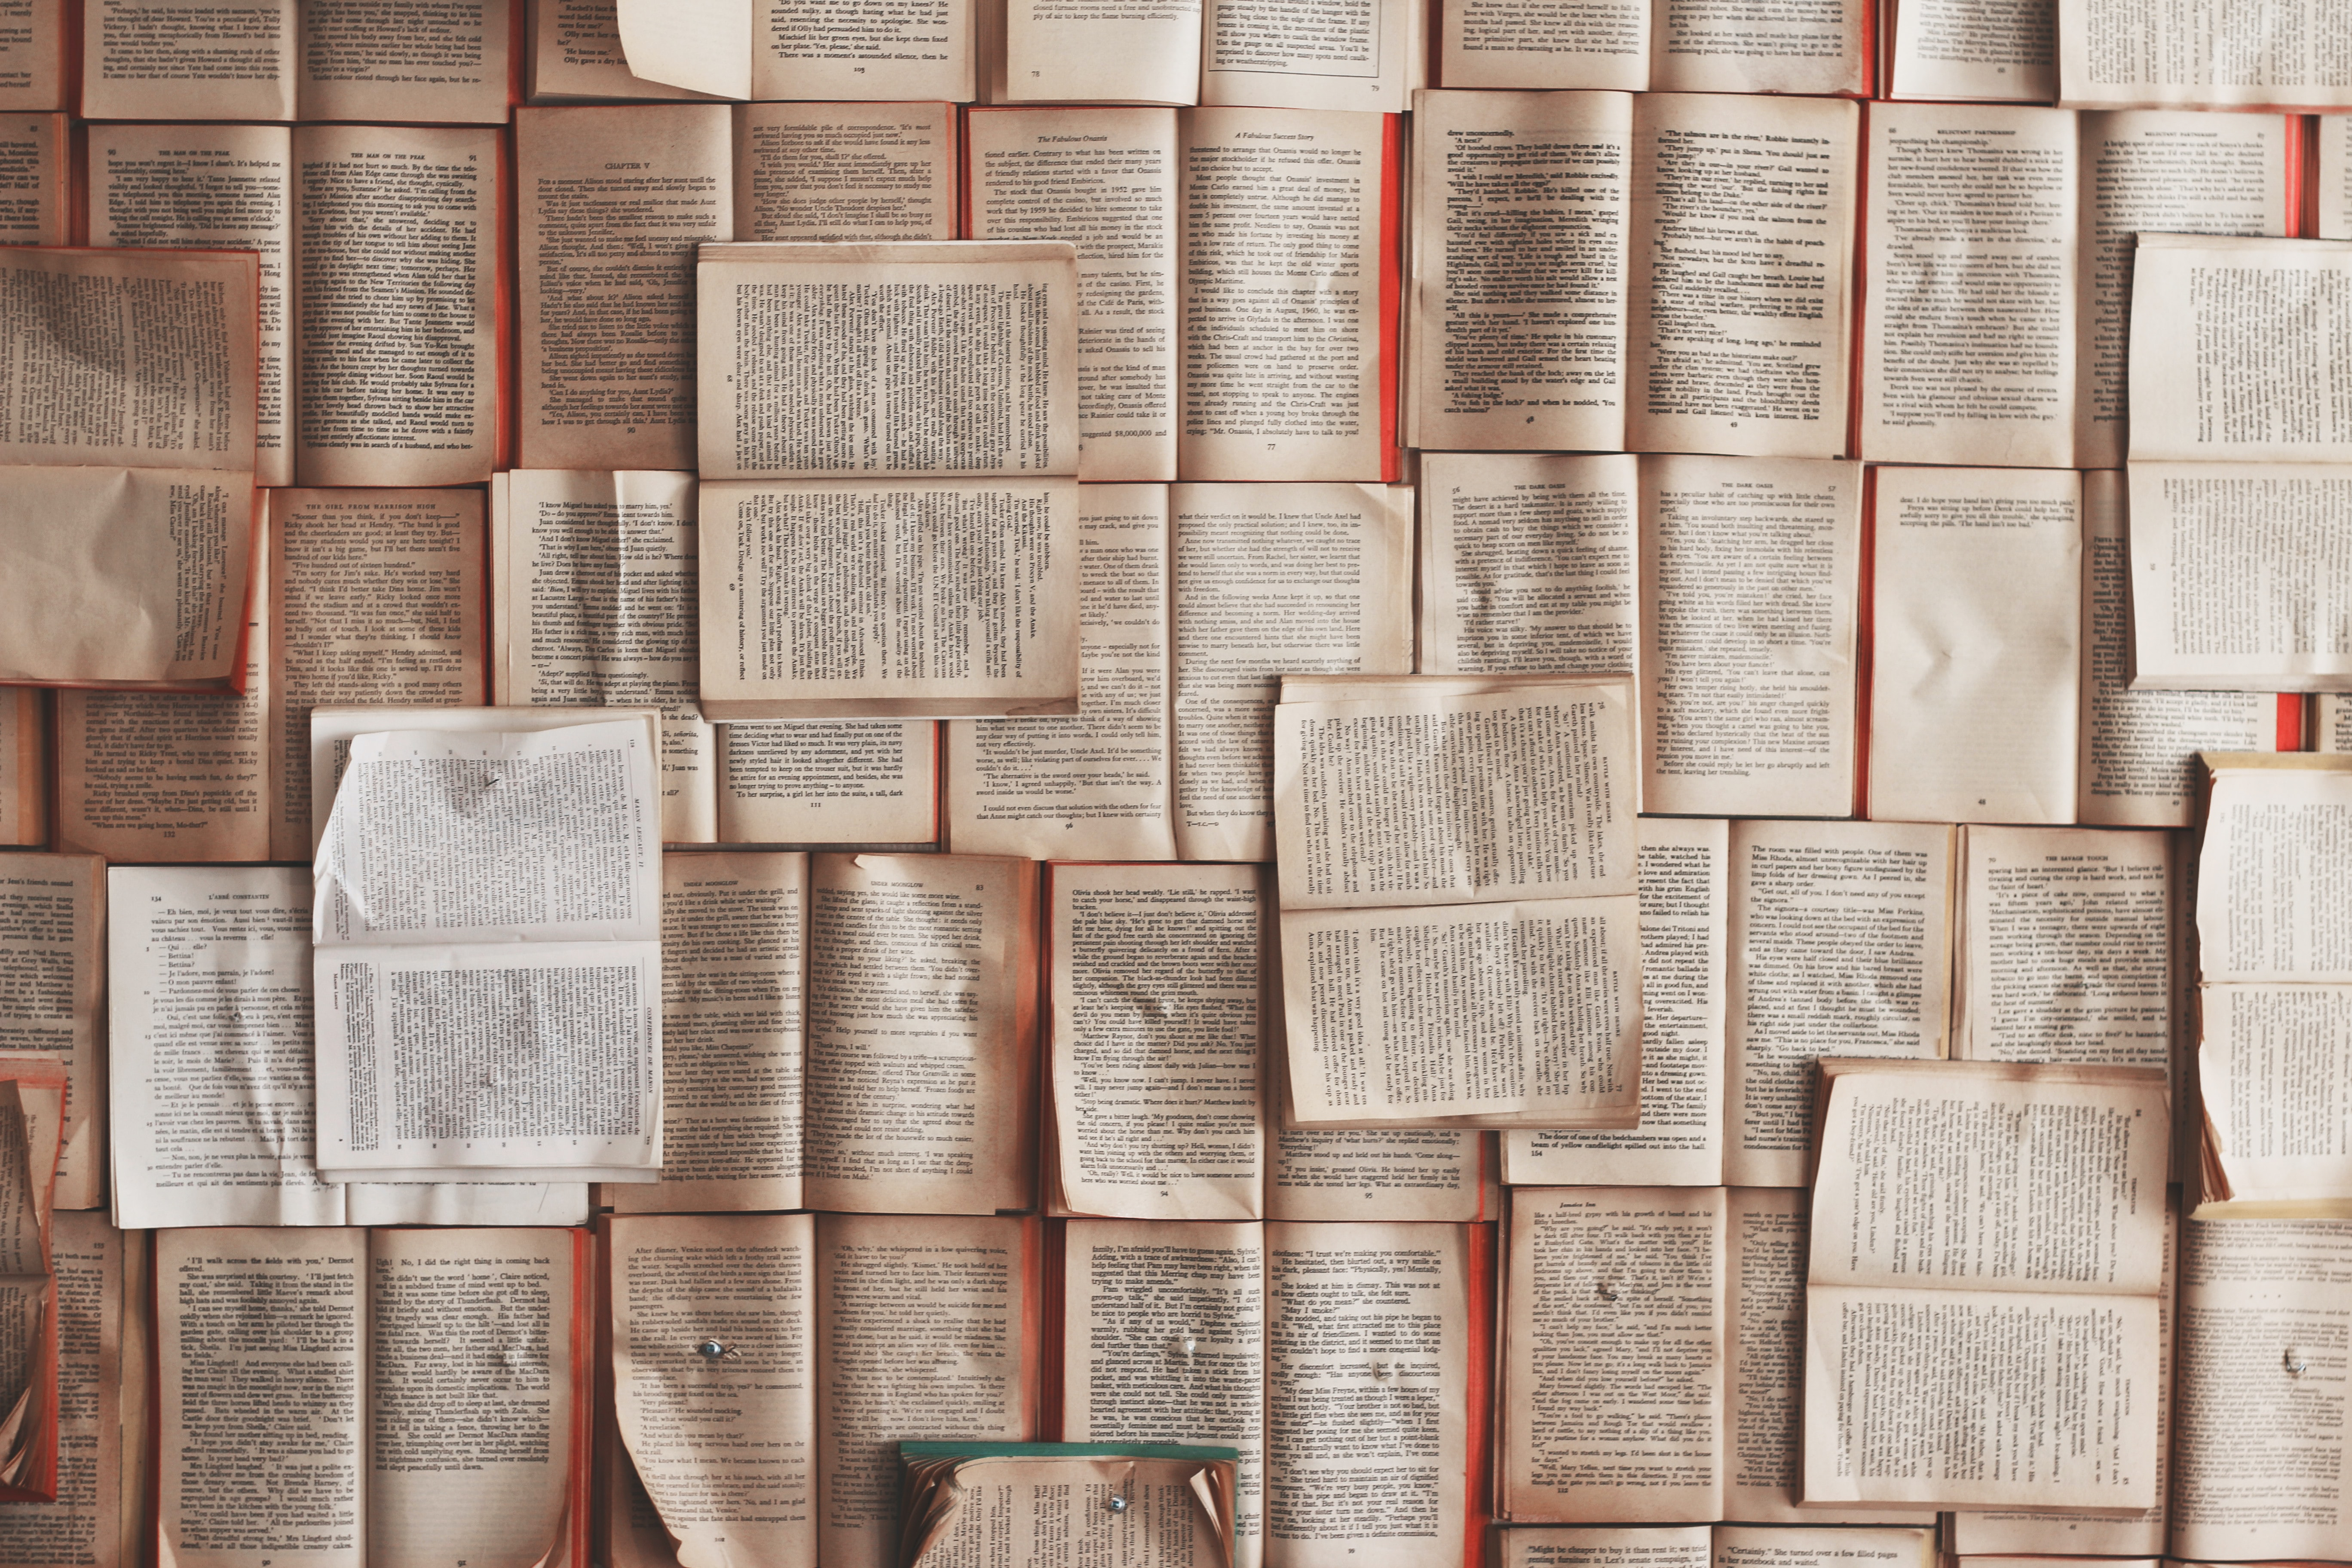
Photo by <a href="https://unsplash.com/@impatrickt?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Patrick Tomasso</a> on <a href="https://unsplash.com/s/photos/words?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## Background
Text summarization is a sub-set of text mining and natural language processing that aims to take long corpus of text and transform them into a summary that can be easily and quickly read and understood without losing the meaning of the original text.

In particular text summarisation "tokenizes" words (i.e. converts them into data) and then assesses the importance of each by looking at relative frequency and other factors. The word importance scores can then be aggregated back into values for sentences with the most important sentences bubbling up to the top of the summary.

If you would like a more in-depth exploration of the principles, this article is a great place to start - https://towardsdatascience.com/a-quick-introduction-to-text-summarization-in-machine-learning-3d27ccf18a9f

## Objective
The objective of this article is to produce a basic interactive text summarization utility to demonstrate the principles and to provide a way of generating basic summaries for complex reports.

The summarization will have been successful if the summaries  impart the majority of the meaning of the source report and can be read and understood in a fraction of the time.

## Preparation
To start with we will need to import the libraries that will be used ...

In [1]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import os 
import docx
import gensim.summarization
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets

## File Operations
The building blocks for our text summarization utility handle the leg-work of allowing the user to browse the local file system to select a file to summarize.

``openfile()`` handles showing the File | Open dialog box, selecting a file, and returning the full path of the selected file.

In [2]:
def openfile():
    """Opens a file on the local storage via a File | Open dialog box

    Returns:
        str: The full path to the file selected via the File | Open dialog or "" if no file was selected
    """
    # Hide the additional dialog box
    root = tk.Tk()
    root.withdraw()
    root.wm_attributes('-topmost', 1)

    # Show the file open dailog box and return the filename
    filename = askopenfilename(initialdir=os.getcwd(), title="Choose Input File", filetypes = (("Word Documents","*.docx"),("Text Files","*.txt")))

    return filename

Next ``getText`` takes the path, opens the file and reads the text contained in the file into a ``str``. The code provided can read from .txt or .docx files.

In [3]:
def getText(filename):
    """Reads the text from a .txt or .docx file

    Args:
        filename (str): The full path to the file to be read

    Returns:
        str: All of the text read from the file
    """
    extension = os.path.splitext(filename)[1][1:] # Extract the extension from the filename
    
    if extension == "txt": # If it is a .txt file just open the file and read the contents
        f = open(filename, "r")
        fullText = f.read()
        return fullText

    if extension == "docx": # if it is a .docx use the docx library to open it
        doc = docx.Document(filename)
        fullText = []

        for para in doc.paragraphs: # Append each paragraph to fullText
            fullText.append(para.text)
        
        return '\n'.join(fullText) # Join each element of fullText, separated with a \n and return the whole as a string
    
    return "" # If the filename does not have a .txt. or .docx extension, return an empty string

## Text Summarization
The main work is done in a single line of code by calling the ``gensim.summarization.summarize`` function. The same effect can be achieved by using the ``nltk`` natural language toolkit but it would be more involved and it would require a bit more low level work.

The ``summarise`` function provides the implementation and it follows 3 basic steps involved in text summarization -

1. Pre-process and prepare the text.
2. Perform the text summarization process.
3. Post-process and tidy the result.

There will be many serious, industry-strength text processing engines that involve complex and comprehensive implementations of these 3 steps but this serves as a good example and it does provide summarization which can be quite useful as we will see.

In [4]:
def summarise(text, word_count=300):
    """Uses text summarization to produce a summary of the text passed in

    Args:
        text (str): The text to summarize
        word_count (int, optional): The maximum number of words to limit the summary to. Defaults to 300.

    Returns:
        str: A summarized version of the text passed in.
    """
    if text == "": # If the text passed in is empty, return an empty string
        return ""

    # There are a lot of combinations of text in the input that can be preprocessed.
    # The code below is a simple example of the sort of preprocessing that can inprove the summarizrion
    striptext = text.replace('\n\n', ' ') # Replace double carriage return linefeed with a space
    striptext = striptext.replace('\n', ' ') # Replace single carriage return linefeed with a space
    striptext = striptext.replace('\t', ' ') # Replace tab with a space
    striptext = striptext.replace('i.e.', '[[ie]]') # Replace i.e. as it is interpreted as two sentences separated by full stops
    
    # Use gensim.summarization.summarize to summarize the text. The internal process is to tokenize the sentences and 
    # words, then assign importance to the words through frequency and other techniques and then to establish the scoring 
    # and weighting for each sentence.
    summary = gensim.summarization.summarize(striptext, word_count=word_count)
    
    # A simple example of post-processing - replace the full stops with a full stops, next line and put any instances of
    # i.e. back as they were before the pre-processing. Lastly return the summarization.
    return summary.replace(".", ".\n").replace('[[ie]]', 'i.e.') 

Once the file has been selected ``gensim.summarization.summarize`` does the work and the output is formatted in the cell output -

## Calling the Text Summarization
The last few helper functions are - 

- ``printmd`` which formats and prints text that includes markup to give us a nicely formatted heading.
- ``openLocalFileAndSummarize`` which calls the functions we have defined above to select a file and summarize the contents.
- ``on_button_clicked`` which handles the button click event to add interactivity to the Notebook and to enable several files to be selected and summarised sequentially.

In [5]:
def printmd(string):
    """Formats and prints a string that can contain HTML markup like <b>, <H> etc.

    Args:
        string (str): The string to format and print containing markup.
    """

    display(Markdown(string)) # Use IPython.display IPython.Markdown and to format and print the string
    
def openLocalFileAndSummarize():
    """Displays a File | Open dialog for the user to select a file from local storage, then prints the title followed by a summarization of the text contained in the selected file.
    """
    file_name = openfile()
    if file_name != "": 
        printmd(f"<b>Executive Summary for {os.path.basename(file_name)}\n</b>")
        print(summarise(getText(file_name)))
        
def on_button_clicked(_):
    """Event handler for the button click

    Args:
        _ (N/A): Dummy parameter which must be passed in or an error is raised
    """
    with out:
      clear_output() # Clear the output from the last run
      openLocalFileAndSummarize() # Open the File | Open dialog box, select a file and summarize it

button = widgets.Button(description='Choose a File') # Create the button
out = widgets.Output() # Create the output
button.on_click(on_button_clicked) # Assign the event handler

## Testing the Summarization
In order to test the text summarization I collected the text from two public web sites which have published freely available reports on the topics of online reporting and marketing.

The two web sites used to provide the test data are -

- https://www.sustainability-reports.com/unleashing-the-power-of-online-reporting/
- https://www.mckinsey.com/business-functions/marketing-and-sales/our-insights/were-all-marketers-now

## Running the Summarization
Lastly a single line of code creates a button that can be clicked repeatedly to select a .txt or a .docx from the local disk which will then be transformed into a 300 word summary which is printed out below.

In [6]:
widgets.VBox([button,out]) # Create a vertical box consisting of the button followed by the output

## Conclusion
Text summarization can be a complex and involved process of pre-processing, summarization and post-processing and a real-world application that could summarize complex reports without losing the meaning of the original text would have commercial value.

However, in this article we have explored the basic concepts and quickly built a simple text summarization tool that can be used to open .txt or .docx files and then summarise the contents into 300 words based on evaluating the most popular sentences.

The test on two public reports proved that the basic text summarization process works and provided an example of what the summarization output looks like.

The full source code can be found here - 

https://github.com/grahamharrison68/Public-Github/blob/master/Text%20Mining/Text%20Summarization%20Article.ipynb

## Thank you for reading!
If you enjoyed reading this article, why not check out my other articles at https://grahamharrison-86487.medium.com/?

Also, I would love to hear from you to get your thoughts on this piece, any of my other articles or anything else related to data science and data analytics.

If you would like to get in touch to discuss any of these topics please look me up on LinkedIn — https://www.linkedin.com/in/grahamharrison1 or feel free to e-mail me at GHarrison@lincolncollege.ac.uk.